In [2]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')
df

date  likes  comments  \
0     2022-01-03     11       210   
1     2022-01-03     10       210   
2     2022-01-03      7        70   
3     2022-01-03     11       220   
4     2022-01-04     12         0   
...          ...    ...       ...   
5627  2022-07-21     24        30   
5628  2022-07-21      1        40   
5629  2022-07-21      0        40   
5630  2022-07-21      1        40   
5631  2022-07-21      0        50   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
5627  https://mbasic.facebook.com/groups/32275791783...   
5628  https://mbasic.facebook.com/groups/32275791783...   
5629  https://mbasic.facebook.com/groups/32275791783...   
5630  https://mbasic.facebook.com/groups/32275791783...   
5631  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ü–ª–∞–Ω–∏—Ä—É—é –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç –≤ –±–∞–Ω–∫–µ PK...   
1     –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç. –ú–æ–∂–µ—Ç —É –∫–æ–≥–æ-—Ç–æ –∏–∑ –≤–∞—Å –±—ã–ª–∞ —Ç–∞–∫–∞—è...   
2     –ö—Ç–æ –º–æ–∂–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–±–æ...   
3     –µ–Ω–Ω–æ). –í–æ–æ–±—â–µ, —á–µ–ª–æ–≤–µ–∫ –∏–∑ –∂–∫—Ö —Å–∫–∞–∑–∞–ª, —á—Ç–æ –æ–±—ã—á...   
4     –ö—Ç–æ –µ—â–µ –≤ —Ä–∞–∑–¥—É–º—å—è—Ö –∏ –Ω–µ –∑–Ω–∞–µ—Ç, –∫–∞–∫—É—é –ø–æ–ª–∏—Ü–∏–∞–ª...   
...                                                 ...   
5627  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—á–µ–Ω—å –Ω–µ–ø—Ä–∏—è—Ç–Ω–∞—è —Å–∏—Ç—É–∞...   
5628  –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞,–∏–∑ –¢–µ—Ä–µ—Å–ø–æ–ª—è –≤ –ë—Ä–µ—Å—Ç,–∫—Ä–æ...   
5629  –î–æ–±—Ä—ã–π –¥–µ–Ω—å, –∫—Ç–æ-–Ω–∏–±—É–¥—å –∑–Ω–∞–µ—Ç, –º–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–≤–∏—Ç...   
5630  –î–æ–±—Ä–∞–≥–∞ –¥–Ω—è, —à–∞–Ω–æ—û–Ω—ã—è ! –ú–æ–∂–∞ —Ç—É—Ç –Ω–µ—Ö—Ç–∞ –ø—Ä–∞—Ü—É–µ ...   
5631  –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –≥–¥–µ –æ—Ñ–æ—Ä–º–∏—Ç—å –¥–æ–≤–µ—Ä–µ–Ω–Ω–æ...   

                                          preproccessed  \
0     –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ü–ª–∞–Ω–∏—Ä—É—é –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç –≤ –±–∞–Ω–∫–µ PKO...   
1     –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç –ú–æ–∂–µ—Ç —É –∫–æ–≥–æ —Ç–æ –∏–∑ –≤–∞—Å –±—ã–ª–∞ —Ç–∞–∫–∞—è ...   
2     –ö—Ç–æ –º–æ–∂–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–±–æ...   
3     –µ–Ω–Ω–æ –í–æ–æ–±—â–µ —á–µ–ª–æ–≤–µ–∫ –∏–∑ –∂–∫—Ö —Å–∫–∞–∑–∞–ª —á—Ç–æ –æ–±—ã—á–Ω–æ –µ...   
4     –ö—Ç–æ –µ—â–µ –≤ —Ä–∞–∑–¥—É–º—å—è—Ö –∏ –Ω–µ –∑–Ω–∞–µ—Ç –∫–∞–∫—É—é –ø–æ–ª–∏—Ü–∏–∞–ª—å...   
...                                                 ...   
5627  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—á–µ–Ω—å –Ω–µ–ø—Ä–∏—è—Ç–Ω–∞—è —Å–∏—Ç—É–∞—Ü...   
5628  –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∏–∑ –¢–µ—Ä–µ—Å–ø–æ–ª—è –≤ –ë—Ä–µ—Å—Ç –∫—Ä–æ...   
5629  –î–æ–±—Ä—ã–π –¥–µ–Ω—å –∫—Ç–æ –Ω–∏–±—É–¥—å –∑–Ω–∞–µ—Ç –º–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–≤–∏—Ç—å ...   
5630  –î–æ–±—Ä–∞–≥–∞ –¥–Ω—è —à–∞–Ω–æ—û–Ω—ã—è –ú–æ–∂–∞ —Ç—É—Ç –Ω–µ—Ö—Ç–∞ –ø—Ä–∞—Ü—É–µ —û —Ç...   
5631  –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –≥–¥–µ –æ—Ñ–æ—Ä–º–∏—Ç—å –¥–æ–≤–µ—Ä–µ–Ω–Ω–æ—Å...   

                                              text_prep  \
0     –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–ª–∞–Ω–∏—Ä—É—é –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç –≤ –±–∞–Ω–∫–µ pko...   
1     –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç –º–æ–∂–µ—Ç —É –∫–æ–≥–æ —Ç–æ –∏–∑ –≤–∞—Å –±—ã–ª–∞ —Ç–∞–∫–∞—è ...   
2     –∫—Ç–æ –º–æ–∂–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–±–æ...   
3     –µ–Ω–Ω–æ –≤–æ–æ–±—â–µ —á–µ–ª–æ–≤–µ–∫ –∏–∑ –∂–∫—Ö —Å–∫–∞–∑–∞–ª —á—Ç–æ –æ–±—ã—á–Ω–æ –µ...   
4     –∫—Ç–æ –µ—â–µ –≤ —Ä–∞–∑–¥—É–º—å—è—Ö –∏ –Ω–µ –∑–Ω–∞–µ—Ç –∫–∞–∫—É—é –ø–æ–ª–∏—Ü–∏–∞–ª—å...   
...                                                 ...   
5627  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—á–µ–Ω—å –Ω–µ–ø—

In [6]:
import requests
from bs4 import BeautifulSoup 
import time
from urllib.parse import urlparse, urljoin
from tqdm.notebook import tqdm
import pickle 
import spacy 
import ru_core_news_sm 
import string 
import nltk

In [7]:
nlp = ru_core_news_sm.load()

In [11]:
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]

In [12]:
# Parser for reviews
punctuations = string.punctuation
stopwords = russian_stopwords

In [13]:
def spacy_processor(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
text_data = [spacy_processor(text) for text in tqdm(df['text_lemm'])]

  0%|          | 0/5632 [00:00<?, ?it/s]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_df=0.8, 
                             min_df=5, 
                             ngram_range=(1, 2),
                             max_features=5000) 

data_vectorized = vectorizer.fit_transform(text_data)

In [30]:
data_vectorized[0].todense().shape

(1, 3574)

In [31]:
import pandas as pd
pd.DataFrame(data_vectorized.todense(), 
             columns=vectorizer.get_feature_names())

al  and  app  app viber  apple  art  bank  bardzo  be  beer  ...  —ñ—Ö  \
0      0    0    0          0      0    0     0       0   0     0  ...   0   
1      0    0    0          0      0    0     0       0   0     0  ...   0   
2      0    0    0          0      0    0     0       0   0     0  ...   0   
3      0    0    0          0      0    0     0       0   0     0  ...   0   
4      0    0    0          0      0    0     0       0   0     0  ...   0   
...   ..  ...  ...        ...    ...  ...   ...     ...  ..   ...  ...  ..   
5627   0    0    0          0      0    0     0       0   0     0  ...   0   
5628   0    0    0          0      0    0     0       0   0     0  ...   0   
5629   0    0    0          0      0    0     0       0   0     0  ...   0   
5630   0    0    0          0      0    0     0       0   0     0  ...   0   
5631   0    0    0          0      0    0     0       0   0     0  ...   0   

      —û–¥–∑—è—á–Ω–∞  —û–¥–∑—è—á–Ω–∞—è  —û–∂–æ  —û–∫—Ä–∞—ñ–Ω–µ  —û—Å–µ  —û—Å—ë  —û—Å—ñ–º  —û—Å—ñ–º –ø–∞–¥–∫–∞–∂—ã—Ü–µ  —û—Å—ñ—Ö  
0           0         0    0        0    0    0     0               0     0  
1           0         0    0        0    0    0     0               0     0  
2           0         0    0        0    0    0     0               0     0  
3           0         0    0        0    0    0     0               0     0  
4           0         0    0        0    0    0     0               0     0  
...       ...       ...  ...      ...  ...  ...   ...             ...   ...  
5627        0         0    0        0    0    0     0               0     0  
5628        0         0    0        0    0    0     0               0     0  
5629        0         0    0        0    0    0     0               0     0  
5630        0         0    0        0    0    0     0               0     0  
5631        0         0    0        0    0    0     0               0     0  

[5632 rows x 3574 columns]

In [32]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF

NUM_TOPICS = 15

# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, 
                                max_iter=15, 
                                learning_method='online', 
                                verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [33]:
data_lsi.shape

(5632, 15)

In [34]:
lsi.components_.shape

(15, 3574)

In [35]:
data_lda.shape

(5632, 15)

In [36]:
lda.components_.shape

(15, 3574)

In [37]:
data_nmf.shape

(5632, 15)

In [38]:
nmf.components_.shape

(15, 3574)

In [39]:
def print_topics(model, vectorizer, n_words=17):
    for idx, topic in enumerate(model.components_):
        print()
        print(f'Topic {idx}:', [(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-n_words - 1:-1]]) 

In [40]:
print_topics(lsi, vectorizer)


Topic 0: [('–≤–∞—Ä—à–∞–≤–∞', 0.5164395198237843), ('–ø–æ–ª—å—à–∞', 0.3819380054672135), ('–≤–∏–∑–∞', 0.3316356738364366), ('–±–µ–ª–∞—Ä—É—Å—å', 0.22486926928456263), ('–ø–æ–ª—å—Å–∫–∏–π', 0.21345345541359687), ('–∫–∞—Ä—Ç–∞', 0.19611311629744002), ('—Ä–±', 0.16600011237158044), ('–µ—Ö–∞—Ç—å', 0.1299372675425241), ('–≥—Ä–∞–Ω–∏—Ü–∞', 0.11688330605138725), ('–ø–æ–±—ã—Ç', 0.10667399595960353), ('–º–∏–Ω—Å–∫', 0.10573783255499065), ('–æ–ø—ã—Ç', 0.09962394762383626), ('–ø–∞—Å–ø–æ—Ä—Ç', 0.09446294509005082), ('–ø–æ–º–æ–≥–∞—Ç—å', 0.0933554651736363), ('–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è', 0.08252557298717234), ('–º–µ—Å—è—Ü', 0.0816301064929253), ('–≤—ã–µ–∑–∂–∞—Ç—å', 0.07789747910776927)]

Topic 1: [('–≤–∏–∑–∞', 0.4073577073303842), ('–ø–æ–ª—å—à–∞', 0.2967956267427322), ('–∫–∞—Ä—Ç–∞', 0.19560688396954107), ('—Ä–±', 0.11160258364486764), ('–ø–æ–±—ã—Ç', 0.11055322643468818), ('–±–µ–ª–∞—Ä—É—Å—å', 0.0951102661258057), ('–≥—Ä–∞–Ω–∏—Ü–∞', 0.07757469057556118), ('–ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏–µ', 0.07639269735783687), ('–ø–∞—Å

In [41]:
# evaluate as the best model
print_topics(nmf, vectorizer)


Topic 0: [('–ø–æ–ª—å—à–∞', 9.75849428920507), ('–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è', 0.6474094908203226), ('–≤—ã–µ–∑–∂–∞—Ç—å', 0.5324470843077433), ('—Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è', 0.525647446102091), ('–±–µ–ª–∞—Ä—É—Å—å –ø–æ–ª—å—à–∞', 0.46146099375875577), ('–±–µ–ª–∞—Ä—É—Å', 0.3967501068453834), ('—Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –ø–æ–ª—å—à–∞', 0.3842880352985828), ('–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è', 0.37165179487149985), ('–∫–∞—Ä–∞–Ω—Ç–∏–Ω', 0.3626161538089801), ('—Å–ø—Ä–∞–≤–∫–∞', 0.3264378957435554), ('–≤—ä–µ–∑–¥ –ø–æ–ª—å—à–∞', 0.2985387250446713), ('–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –ø–æ–ª—å—à–∞', 0.29456667320854746), ('–≤—ä–µ–∑–¥', 0.293056290170052), ('—Ä–± –ø–æ–ª—å—à–∞', 0.26507442048430385), ('—É–∫—Ä–∞–∏–Ω–∞', 0.26296027243581904), ('–≤—ã–µ–∑–∂–∞—Ç—å –ø–æ–ª—å—à–∞', 0.2612170230171136), ('–≤—ä–µ–∑–∂–∞—Ç—å', 0.2467336951553025)]

Topic 1: [('–≤–∞—Ä—à–∞–≤–∞', 5.40053813605474), ('–º–∏–Ω—Å–∫', 0.19306940536483022), ('–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è', 0.1628803898359397), ('–æ–ø—ã—Ç', 0.1559330928368578), ('–±–µ–ª–∞—Ä—É—Å', 0.15256775855301968), ('–

In [42]:
print_topics(lda, vectorizer)


Topic 0: [('–±–µ–ª–∞—Ä—É—Å—å', 396.1172841124335), ('–±–∞–Ω–∫', 157.29988240186375), ('–ø–æ–ª—å—à–∞', 153.15660895794917), ('—Å—á—ë—Ç', 110.02830715679224), ('–≥—Ä–∞–Ω–∏—Ü–∞', 107.22286900077111), ('–≤–∞—Ä—à–∞–≤–∞', 85.36921192694726), ('–ø–æ–ª—å—Å–∫–∏–π', 81.53756629742193), ('—Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è', 77.03420259750794), ('–±—Ä–µ—Å—Ç', 74.56538029302445), ('–ø—Ä–æ–±–ª–µ–º–∞', 67.61095585863998), ('–≥—Ä–∞–∂–¥–∞–Ω–∏–Ω', 66.41861418529447), ('–º–∞–≥–∞–∑–∏–Ω', 58.90515240553913), ('–±–µ–ª–∞—Ä—É—Å—å –ø–æ–ª—å—à–∞', 58.85588862312894), ('–±–µ–ª–∞—Ä—É—Å', 53.448305200141135), ('–∞–≤—Ç–æ', 53.35769117844581), ('–∂—ã–≤', 53.322465577276006), ('–ø–µ—Ä–µ–≤–æ–¥–∏—Ç—å', 51.35885896586845)]

Topic 1: [('–∫–∞—Ä—Ç–∞', 549.0775245012285), ('–ø–æ–±—ã—Ç', 310.1128809843107), ('–ø–æ–ª—è–∫', 189.23915327861457), ('–ø–æ–¥–∞–≤–∞—Ç—å—Å—è', 181.23237768354466), ('–≤–∏–∑–∞', 163.31102461669232), ('–ø–æ–¥–∞—á–∞', 139.11110277234164), ('–∫–∞—Ä—Ç–∞ –ø–æ–ª—è–∫', 126.93012695000051), ('–∫–∞—Ä—Ç–∞ –ø–æ–±—ã—Ç', 122.1

In [43]:
#Visualisation of LSI

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import random
import pandas as pd

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [44]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lsi, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [45]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [46]:
source.head(20)

x_umap    y_umap     x_tsne     y_tsne  topic    color
0   10.803359 -1.934191 -16.248903  25.322460     14  #95D8B4
1   10.383365 -0.529217 -22.125017   3.583147      5  #6F8A9E
2   13.992523 -1.029248  24.552837  17.856535      9  #D14C3A
3   11.298076  0.099153  -9.202599  26.253242      5  #6F8A9E
4   12.808440  3.266818  14.861156 -22.726587      0  #19931C
5   13.335905  1.246024  11.012249  -5.226171      0  #19931C
6   10.147733  0.935353 -28.207125 -16.380177      5  #6F8A9E
7   12.621490  3.039687   4.535703 -13.761297      0  #19931C
8   14.231654  1.922162  28.087969 -17.405329      7  #D037B4
9    9.070084 -1.775066 -28.877644  27.944960      2  #9D9D6B
10  13.925022 -1.309820  16.831720  18.966537      8  #15B2EF
11  13.731643  1.025774  29.062468   6.665350     10  #B1F05D
12  12.664931 -0.191177   3.542593   6.973523      9  #D14C3A
13   9.948829 -2.053549 -28.271082  16.012787      2  #9D9D6B
14  10.289554  0.590945 -27.480749 -10.345733      0  #19931C
15  10.380490  2.092139 -18.901493 -28.611942      0  #19931C
16  10.551263 -0.233643 -19.799013   9.408463      0  #19931C
17  13.055925 -0.669086   9.931157   2.041349      0  #19931C
18  10.381780  3.523619  -6.801198 -37.129387      0  #19931C
19  11.859000  0.214721  -8.067834   2.648097      6  #FE70A7

In [47]:
print(source)

         x_umap    y_umap     x_tsne     y_tsne  topic    color
0     10.803359 -1.934191 -16.248903  25.322460     14  #95D8B4
1     10.383365 -0.529217 -22.125017   3.583147      5  #6F8A9E
2     13.992523 -1.029248  24.552837  17.856535      9  #D14C3A
3     11.298076  0.099153  -9.202599  26.253242      5  #6F8A9E
4     12.808440  3.266818  14.861156 -22.726587      0  #19931C
...         ...       ...        ...        ...    ...      ...
5627  10.219307  2.626633 -14.232369 -34.727150      5  #6F8A9E
5628  13.142753 -0.271690   2.741392 -45.427483      5  #6F8A9E
5629  14.258495 -1.665213 -39.472237   2.610850      1  #EC97B5
5630  14.423500 -1.654110   3.024311  24.402109      8  #15B2EF
5631  10.245642 -0.281078 -22.226355   6.610656      5  #6F8A9E

[5632 rows x 6 columns]


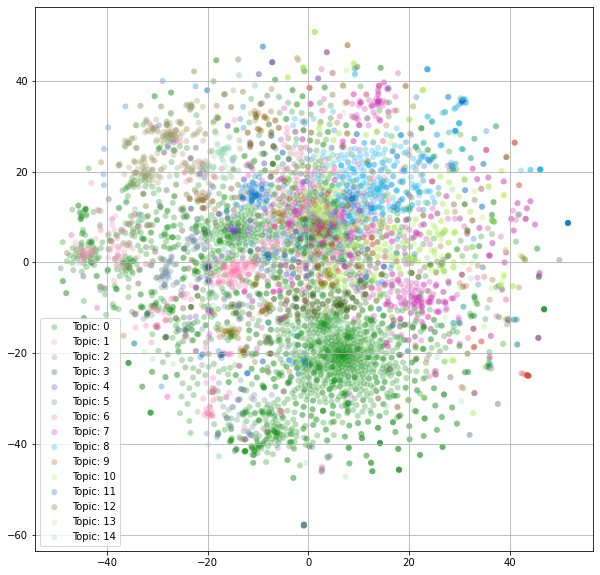

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

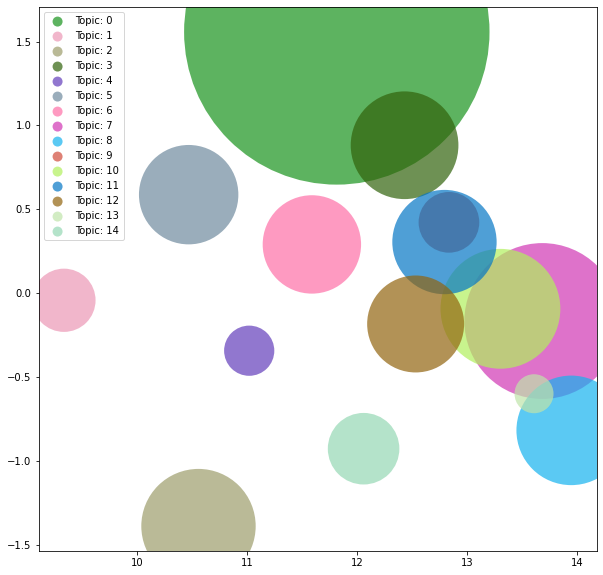

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [50]:
#Visualisation of NMF

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [51]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_nmf, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [52]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [53]:
source.head()

x_umap    y_umap     x_tsne     y_tsne  topic    color
0  10.803359 -1.934191 -16.248903  25.322460     14  #B76C1E
1  10.383365 -0.529217 -22.125017   3.583147      5  #73CAE5
2  13.992523 -1.029248  24.552837  17.856535      9  #95C3F2
3  11.298076  0.099153  -9.202599  26.253242      5  #73CAE5
4  12.808440  3.266818  14.861156 -22.726587      1  #71B107

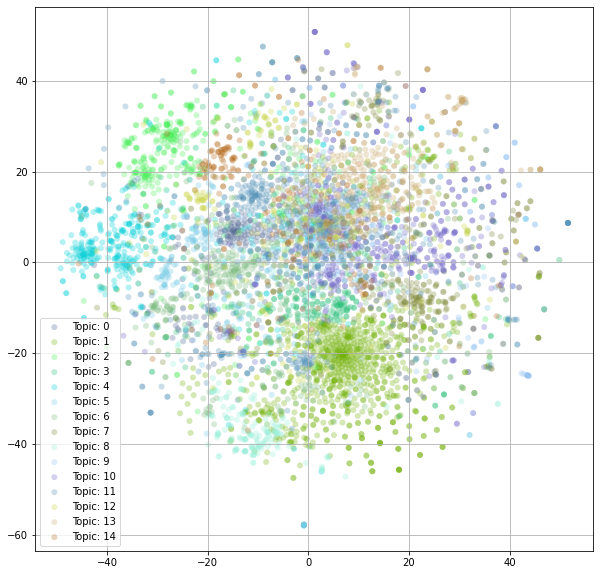

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

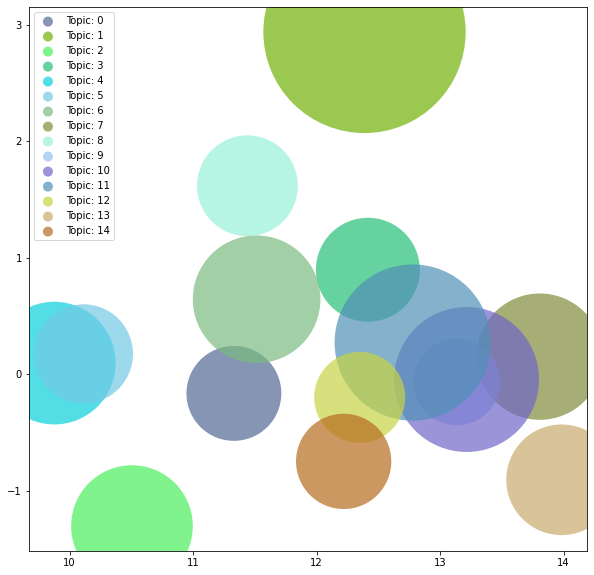

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [56]:
#Visualisation of LDA

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [57]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lda, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [58]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [59]:
source.head()

x_umap    y_umap     x_tsne     y_tsne  topic    color
0  10.803359 -1.934191 -16.248903  25.322460      4  #BC87CC
1  10.383365 -0.529217 -22.125017   3.583147     12  #CF11B6
2  13.992523 -1.029248  24.552837  17.856535      7  #A2D60A
3  11.298076  0.099153  -9.202599  26.253242     12  #CF11B6
4  12.808440  3.266818  14.861156 -22.726587     10  #D9B3EC

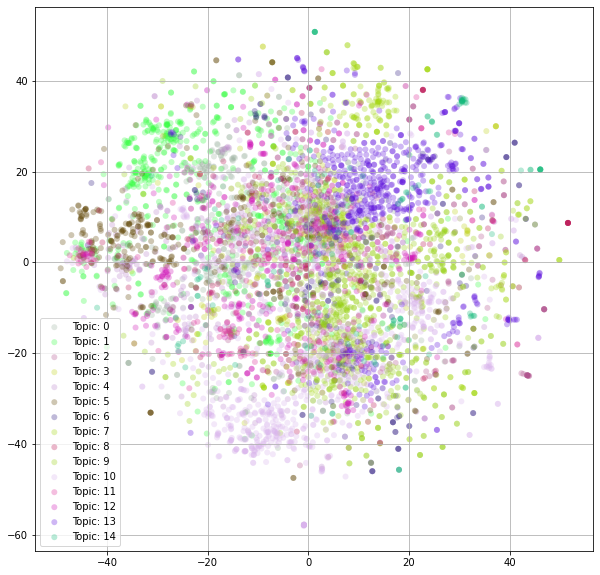

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() ## –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ —Å —ç—Ç–∏–º —Ü–≤–µ—Ç–æ–º
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

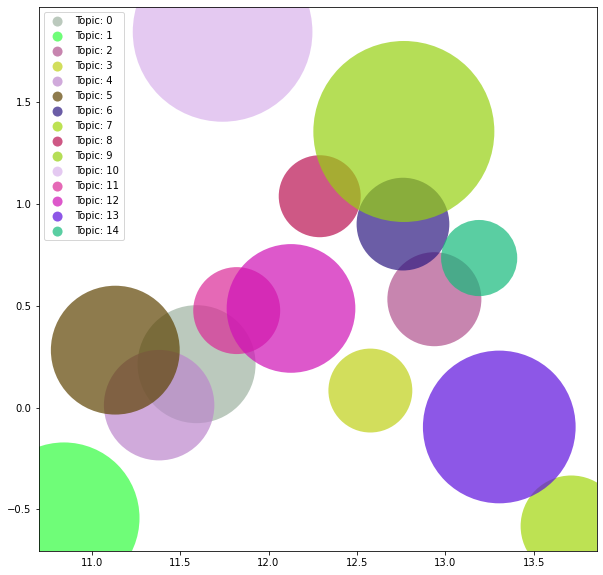

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() ## –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ —Å —ç—Ç–∏–º —Ü–≤–µ—Ç–æ–º
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [62]:
nmf.components_[0]

array([0.        , 0.        , 0.00564862, ..., 0.        , 0.        ,
       0.        ])

In [63]:
#the most characteristic word for topic 
np.argmax(nmf.components_[0])

2348

In [65]:
vectorizer.get_feature_names()[2348]

'–ø–æ–ª—å—à–∞'

In [66]:
nmf.components_

array([[0.        , 0.        , 0.00564862, ..., 0.        , 0.        ,
        0.        ],
       [0.00039306, 0.        , 0.00533751, ..., 0.02272534, 0.00347475,
        0.02506581],
       [0.        , 0.        , 0.        , ..., 0.00272189, 0.00409294,
        0.00170041],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0020154 , 0.00134328, 0.        , ..., 0.02003144, 0.00436248,
        0.01810488],
       [0.00355794, 0.00010573, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
lda.components_

array([[ 0.06666683,  0.0666667 ,  0.06666679, ...,  0.06666673,
         0.06666682,  0.06666673],
       [ 0.0666667 ,  0.06666669,  0.06666698, ...,  0.06666671,
         0.06666673,  0.0666667 ],
       [ 7.17481646,  0.06666671,  0.06666672, ...,  0.06666671,
         0.0666667 ,  0.0666667 ],
       ...,
       [ 0.06666701,  0.06666672,  0.06666676, ...,  0.06666671,
         0.0666667 ,  0.0666667 ],
       [ 0.06666721,  0.0666667 ,  0.0666667 , ..., 24.34148882,
         5.2569508 , 15.77236976],
       [ 0.06666681,  0.06666672,  0.06666672, ...,  0.06666689,
         0.06666676,  0.06666671]])

In [68]:
lda.components_[0]

array([0.06666683, 0.0666667 , 0.06666679, ..., 0.06666673, 0.06666682,
       0.06666673])

In [69]:
#the most characteristic word for topic 
np.argmax(lda.components_[0])

417

In [70]:
vectorizer.get_feature_names()[417]

'–±–µ–ª–∞—Ä—É—Å—å'

In [71]:
lsi.components_

array([[ 5.29823786e-04,  2.15575949e-05,  8.31360600e-04, ...,
         2.00066160e-03,  3.80916604e-04,  1.96924805e-03],
       [-5.64781684e-04, -1.80783551e-05, -8.83516933e-04, ...,
        -3.15157558e-03, -4.02694737e-04, -3.50618764e-03],
       [ 4.01113518e-04,  7.04089012e-06, -2.29018166e-04, ...,
         7.45117984e-04,  7.11020915e-04,  8.76149662e-04],
       ...,
       [-7.29784820e-04, -6.47775859e-06, -7.57788954e-05, ...,
        -4.53577796e-03, -1.27116544e-03, -4.45140937e-03],
       [ 3.13296320e-03, -4.98293787e-05,  6.31197101e-05, ...,
         3.80156487e-04, -8.21110800e-05, -4.39121435e-04],
       [ 2.51282960e-04, -1.16273600e-04,  1.45903082e-04, ...,
        -5.92253770e-03, -1.44236811e-03, -3.24120587e-03]])

In [72]:
lsi.components_[0]

array([5.29823786e-04, 2.15575949e-05, 8.31360600e-04, ...,
       2.00066160e-03, 3.80916604e-04, 1.96924805e-03])

In [73]:
#the most characteristic word for topic 
np.argmax(lsi.components_[0])

547

In [74]:
vectorizer.get_feature_names()[547]

'–≤–∞—Ä—à–∞–≤–∞'

In [75]:
nmf.components_.shape

(15, 3574)

In [76]:
lsi.components_.shape

(15, 3574)

In [77]:
lda.components_.shape

(15, 3574)

In [78]:
len(text_data)

5632

In [79]:
data_vectorized.shape

(5632, 3574)

In [80]:
#check nmf model for prediction
#posts from group 06/11/2022
import numpy as np
new_text = '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –¥–æ—Ä–æ–≥–∏–µ –∑–µ–º–ª—è–∫–∏! –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –º–æ–∂–Ω–æ –ª–∏ –Ω–∞—Ö–æ–¥—è—Å—å –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ –ü–æ–ª—å—à–∏ –ø–æ —Ä–∞–±–æ—á–µ–π –¥–µ–π—Å—Ç–≤—É—é—â–µ–π –≤–∏–∑–µ, –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω—É –†–ë, –ø–æ–µ—Ö–∞—Ç—å –≤ –ì–µ—Ä–º–∞–Ω–∏—é –ø–æ–µ–∑–¥–æ–º? –ü—Ä–æ–≤–µ—Ä—è—é—Ç –ª–∏ –ø–∞—Å–ø–æ—Ä—Ç–∞ —É –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –∏ –≤–æ–æ–±—â–µ  –∑–∞–∫–æ–Ω–Ω–æ –ª–∏ —ç—Ç–æ? –ù–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä—É—é—Å—å —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –≤ —Ç–µ–ø–µ—Ä–µ—à–Ω–µ–π —Å–∏—Ç—É–∞—Ü–∏–∏. –ë—É–¥—É –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞ –∑–∞ –ª—é–±—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.'
new_corpus = [new_text]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

5

In [81]:
new_text2 = '–î–µ–ª—é—Å—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π, –µ—Å–ª–∏ –∫–æ–º—É-—Ç–æ –±—É–¥–µ—Ç –ø–æ–ª–µ–∑–Ω–æ: –°–µ–≥–æ–¥–Ω—è –∑–∞–±—Ä–∞–ª–∞ umiejscowienie aktu urodzenia. –î–µ–ª–∞–ª–æ—Å—å 1 –º–µ—Å—è—Ü, –≤–ø–∏—Å–∞–ª–∏ –¥–µ–≤–∏—á—å—é —Ñ–∞–º–∏–ª–∏—é –º–∞—Ç–µ—Ä–∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Å–ø—Ä–∞–≤–∫–∏ –∏–∑ –∑–∞–≥—Å–∞ –æ –∑–∞–∫–ª—é—á–µ–Ω–∏–∏ –±—Ä–∞–∫–∞ —Ä–æ–¥–∏—Ç–µ–ª–µ–π. –°–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤ –æ—Ç—Ü–∞ –∏ –º–∞—Ç–µ—Ä–∏ –Ω–µ –ø—Ä–æ—Å–∏–ª–∏ –¥–∞–∂–µ –ø–æ–∫–∞–∑–∞—Ç—å.UrzƒÖd sranu cywilnego w Starych Babicach. –ó–∞–ø–∏—Å—ã–≤–∞–ª–∞—Å—å –≤ –∫–æ–Ω—Ü–µ –∏—é–ª—è –Ω–∞ –∫–æ–Ω–µ—Ü —Å–µ–Ω—Ç—è–±—Ä—è'
new_corpus = [new_text2]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

9

In [89]:
new_text3 = '–í—Å–µ–º –ø—Ä–∏–≤–µ—Ç. –¢—É—Ç –≤ –≥—Ä—É–ø–ø–µ —É–ø–æ–º–∏–Ω–∞–ª–∏ —á–∞—Ç-–±–æ—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –∂–∏–ª—å—è. –ú–æ–∂–µ—Ç –∫—Ç–æ-–Ω–∏–±—É–¥—å –¥–∞—Ç—å —Å—Å—ã–ª–∫—É –Ω–∞ –Ω–µ–≥–æ? –ù–µ —Å–æ—Ö—Ä–∞–Ω–∏–ª–∞ —Å—Ä–∞–∑—É. –ê —Å–µ–π—á–∞—Å –ø–æ –ø–æ–∏—Å–∫—É –ø—Ä–æ–±–æ–≤–∞–ª–∞ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã, –Ω–µ –Ω–∞—à–ª–∞ ü•∫ –ë—É–¥—É –æ—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞'
new_corpus = [new_text3]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

11

In [90]:
new_text4 ='–í –Ω–æ–≤—ã–π —Å–∞–ª–æ–Ω –≤ –í–∞—Ä—à–∞–≤–µ —Ç—Ä–µ–±—É—é—Ç—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏: –º–∞—Å—Å–∞–∂–∏—Å—Ç (–∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π, –ª–∏–º—Ñ–æ–¥—Ä–µ–Ω–∞–∂–Ω—ã–π, –∞–Ω—Ç–∏—Ü–µ–ª–ª—é–ª–∏—Ç–Ω—ã–π) –∏ –∫–æ—Å–º–µ—Ç–æ–ª–æ–≥. –û—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ. –ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ 4500 –∑–ª–æ—Ç—ã—Ö –Ω–µ—Ç—Ç–æ. –†–∞–±–æ—Ç–∞ –≤ –¥–≤–µ —Å–º–µ–Ω—ã  –ø–æ 8 —á–∞—Å–æ–≤ –≤ –¥–µ–Ω—å. ( –ì—Ä–∞—Ñ–∏–∫ –æ–±—Å—É–∂–¥–∞–µ–º) –ü–µ—Ä–µ—Ä—ã–≤ –º–µ–∂–¥—É –º–∞—Å—Å–∞–∂–∞–º–∏ 30 –º–∏–Ω—É—Ç.üôèüèΩ–ó–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã–º –ø–∏—Å–∞—Ç—å –≤ –ª–∏—á–∫—É'
new_corpus = [new_text4]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

9

In [91]:
new_text5 ='–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ú–æ–∂–Ω–æ –ª–∏ —É—Å—Ç—Ä–æ–∏—Ç—å—Å—è –Ω–∞ —Ä–∞–±–æ—Ç—É –≤ —à–∫–æ–ª–µ —É—á–∏—Ç–µ–ª–µ–º –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞,  –∏–º–µ—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –†–ë –∏ –æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –≤ —à–∫–æ–ª–µ –†–ë.–∑–Ω–∞–Ω–∏–µ –ø–æ–ª—å—Å–∫–æ–≥–æ –∏–º–µ–µ—Ç—Å—è –ë1 –∑–¥–∞–Ω –µ–∫–∑–∞–º–µ–Ω'
new_corpus = [new_text5]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

5

In [92]:
next_text6 ='–î–æ–±—Ä–æ–≥–æ –¥–Ω—è –≤—Å–µ–º. –ü—Ä–æ—Å–º–æ—Ç—Ä–µ–ª–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –ø–æ—Å—Ç—ã –Ω–∞ —Ç–µ–º—É. –ü—Ä–æ—à—É –Ω–µ –ø—É—Ç–∞—Ç—å –ø—Å–∏—Ö–∏–∞—Ç—Ä–∞ –∏ –ø—Å–∏—Ö–æ–ª–æ–≥–∞. –ù–∞–º –Ω—É–∂–µ–Ω –≤—Ä–∞—á –ø—Å–∏—Ö–∏–∞—Ç—Ä, –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è –ø–æ –°–î–í–ì( —Å–∏–Ω–¥—Ä–æ–º –¥–µ—Ñ–µ—Ü–∏—Ç–∞ –≤–Ω–∏–º–∞–Ω–∏—è –≥–∏–ø–µ—Ä–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å). –ü–æ–¥—Ä–æ—Å—Ç–æ–∫. –í–æ–∑–º–æ–∂–Ω–æ –∫—Ç–æ —Ç–æ –≤ –í–∞—Ä—à–∞–≤–µ —É–∂–µ –æ–±—Ä–∞—â–∞–ª—Å—è –∫ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—É —Å —Ç–∞–∫–∏–º –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º –∑–∞–ø—Ä–æ—Å–æ–º. –ó–∞—Ä–∞–Ω–µ–µ –±–ª–∞–≥–æ–¥–∞—Ä—é.'
new_corpus = [next_text6]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))


11

In [93]:
next_text7 ='–í—Å–µ–º –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ú–æ–∂–µ—Ç –µ—Å—Ç—å —Å–æ–æ—Ç–µ—á–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫–∏ —Å —Ñ–∏—Ä–º–æ–π –ø–æ –∏–∑–≥–æ—Ç–æ–≤–ª–µ–Ω–∏—é –º–µ–±–µ–ª–∏. –ù—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –∫–∞—Ä–∫–∞—Å –∫—Ä–æ–≤–∞—Ç–∏ –Ω–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π 140-190.'
new_corpus = [next_text7]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

11

In [94]:
next_text8 ='–î–æ–±—Ä–æ–≥–æ –¥–Ω—è –≤—Å–µ–º. –ü–æ –ø—Ä–æ—Å—å–±–µ —Ö–æ–∑—è–µ–≤ –ø—É–±–ª–∏–∫—É—é –æ–±—ä—è–≤–ª–µ–Ω–∏–µ. –°–¥–∞–µ—Ç—Å—è 3—Ö –∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤ –í–∞—Ä—à–∞–≤–µ/Wola. 65–∫–≤/–º. –ú–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –µ—Å—Ç—å –≤—Å—è —Ç–µ—Ö–Ω–∏–∫–∞, –æ–≥—Ä–æ–º–Ω—ã–π –±–∞–ª–∫–æ–Ω (20–∫–≤/–º). –º–µ—Å—Ç–æ –≤ –ø–æ–¥–∑–µ–º–Ω–æ–º –ø–∞—Ä–∫–∏–Ω–≥–µ.–ü–æ –æ–ø–ª–∞—Ç–µ 6000 PLN –∑–∞ –≤—Å–µ, –≤–∫–ª—é—á–∞—è –≤–æ–¥—É/—ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ/–∏–Ω—Ç–µ—Ä–Ω–µ—Ç.–ü—Ä–æ–∂–∏–ª–∏ —Ç–∞–º –ø–æ–ª–≥–æ–¥–∞ - —Ç–µ–ø–ª–æ, —Å–æ—Å–µ–¥–µ–π –Ω–µ —Å–ª—ã—à–Ω–æ, –ø—Ä–æ–±–ª–µ–º –≤–æ–æ–±—â–µ –Ω–∏–∫–∞–∫–∏—Ö. –°—å–µ–∑–∂–∞–µ–º —Ç–æ–ª—å–∫–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç —Ä–∞–π–æ–Ω.'
new_corpus = [next_text8]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

7

In [95]:
next_text9 ='–î–æ–±—Ä—ã–π –≤–µ—á–µ—Ä! –£ –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å, –≤—ä–µ—Ö–∞–ª–∞ –≤ –ü–æ–ª—å—à—É –ø–æ —Ä–∞–±–æ—á–µ–π –≤–∏–∑–µ, —Å –ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏–µ–º —Ä–∞–±–æ—á–∏–º, –Ω–æ –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏—é –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∞, –¥–≤–µ –Ω–µ–¥–µ–ª–∏ –Ω–∞–∑–∞–¥ –≤—ã–µ—Ö–∞–ª–∞ –∏–∑ —Å—Ç—Ä–∞–Ω—ã –ø–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏, –∫–∞–∫–∏–µ –º–Ω–µ –Ω—É–∂–Ω—ã –¥–æ–∫—É–º–µ–Ω—Ç—ã —Å–µ–π—á–∞—Å –¥–ª—è –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è –≥—Ä–∞–Ω–∏—Ü—ã? –∑–∞—Ä–∞–Ω–µ–µ –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞ –∑–∞ –æ—Ç–≤–µ—Ç—ã'
new_corpus = [next_text9]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

0

In [96]:
next_text10 ='–î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ú–æ–∂–µ—Ç —É –∫–æ–≥–æ –µ—Å—Ç—å –±–µ–ª–æ—Ä—É—Å—Å–∫–∞—è –∫–∞—Ä—Ç–∞ –∏ —Ö–æ—Ç–µ–ª –±—ã –ø–æ–º–µ–Ω—è—Ç—å –±–µ–ª —Ä—É–±–ª–∏ —Å —ç—Ç–æ–π –∫–∞—Ä—Ç—ã –Ω–∞ –∑–ª–æ—Ç—ã–µ –Ω–∞ –ø–æ–ª—å—Å–∫—É—é –∫–∞—Ä—Ç—É/–Ω–∞–ª–∏—á–∫—É? –ú–Ω–µ –Ω—É–∂–Ω–æ –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –æ–ø–ª–∞—Ç—É –≤ –±–µ–ª —Ä—É–±–ª—è—Ö, –∞ –æ–ø–ª–∞—Ç–∞ —Å –ø–æ–ª—å—Å–∫–æ–π –∫–∞—Ä—Ç—ã —É –º–µ–Ω—è –Ω–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç.'
new_corpus = [next_text10]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

2

In [111]:
# Getting the wordclouds from topics
max_df = 0.8 
min_df = 5
#max_features= 5000
cv = CountVectorizer(max_df=max_df, min_df=min_df, max_features=None,lowercase=True)
#Fitting count vectorizer 
data_vectorized = vectorizer.fit_transform(text_data)

#getting the terms(features) generated by count vectorizer
terms = vectorizer.get_feature_names()

In [112]:
total_topics =15
# next step is to implement Latent Drichilet Allocation 
# next step is to implement NMF

nmf = NMF(n_components=total_topics)
nmfTransform = nmf.fit_transform(data_vectorized)



# lda = LatentDirichletAllocation(n_components=total_topics, 
#             max_iter=15,learning_method='online', 
#             learning_offset=15,random_state=1234)
# ldaTransform = lda.fit_transform(data_vectorized)

#declaring number of terms we need per topic
terms_count = 25

C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [113]:
vocabulary = vectorizer.get_feature_names()

In [132]:
for i, comp in enumerate(nmf.components_):
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
–ø–æ–ª—å—à–∞ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤—ã–µ–∑–∂–∞—Ç—å —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –±–µ–ª–∞—Ä—É—Å—å –ø–æ–ª—å—à–∞ –±–µ–ª–∞—Ä—É—Å —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –ø–æ–ª—å—à–∞ –∫–∞—Ä–∞–Ω—Ç–∏–Ω –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è —Å–ø—Ä–∞–≤–∫–∞ –≤—ä–µ–∑–¥ –ø–æ–ª—å—à–∞ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –ø–æ–ª—å—à–∞ –≤—ä–µ–∑–¥ —Ä–± –ø–æ–ª—å—à–∞ —É–∫—Ä–∞–∏–Ω–∞ 

Topic 1: 
–≤–∞—Ä—à–∞–≤–∞ –º–∏–Ω—Å–∫ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –±–µ–ª–∞—Ä—É—Å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–µ–∑–∂–∞—Ç—å —Ü–µ–Ω—Ç—Ä –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å –∂–∏–ª—å—ë –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤–∞—Ä—à–∞–≤–∞ –ø–µ—Ä–µ–µ–∑–∂–∞—Ç—å –∫–æ–Ω—Ç–∞–∫—Ç –º–∏–Ω—Å–∫ –≤–∞—Ä—à–∞–≤–∞ —Ü–µ–Ω—Ç—Ä –≤–∞—Ä—à–∞–≤–∞ –∞–ø—Ä–µ–ª—å 

Topic 2: 
–∫–∞—Ä—Ç–∞ –ø–æ–±—ã—Ç –ø–æ–ª—è–∫ –∫–∞—Ä—Ç–∞ –ø–æ–ª—è–∫ –∫–∞—Ä—Ç–∞ –ø–æ–±—ã—Ç –ø–æ–¥–∞–≤–∞—Ç—å—Å—è –ø–æ–¥–∞—á–∞ —Å—Ç–∞–ª—ã–π –ø–æ–ª—É—á–µ–Ω–∏–µ —Å—Ç–∞–ª—ã–π –ø–æ–±—ã—Ç –ø–æ–¥–∞–≤–∞—Ç—å –ø–æ–¥–∞–≤–∞—Ç—å—Å—è –∫–∞—Ä—Ç–∞ –¥–µ—Ü–∏–∑–∏—è –ø–æ–±—ã—Ç –∫–∞—Ä—Ç–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—Ä—Ç–∞ 

Topic 3: 
–ø–æ–ª—å—Å–∫–∏–π —è–∑—ã–∫ –ø–æ–ª—å—Å–∫–∏–π —è–∑—ã–∫ –∑–Ω–∞–Ω–∏–µ –∑–Ω–∞–Ω–∏–µ

In [115]:
from wordcloud import WordCloud


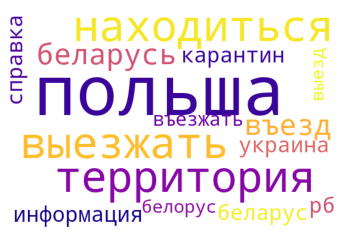

In [140]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = 'plasma')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


draw_word_cloud(0)

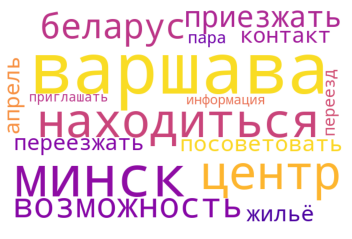

In [141]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='plasma')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(1)


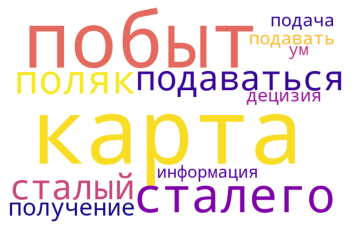

In [142]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(2)

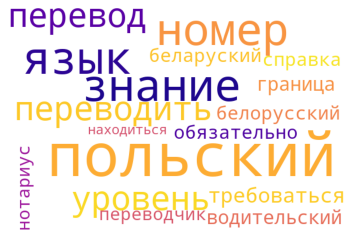

In [143]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(3)

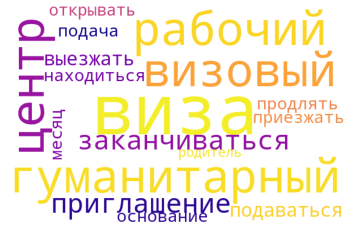

In [144]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(4)

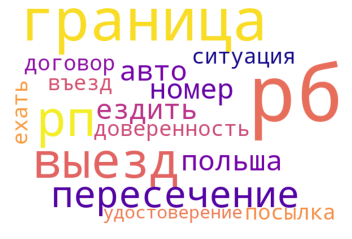

In [145]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(5)

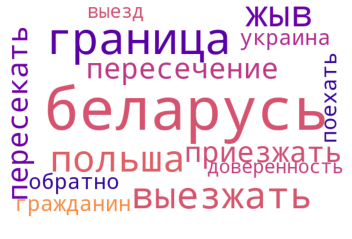

In [146]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(6)

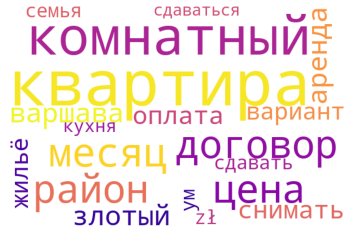

In [147]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(7)

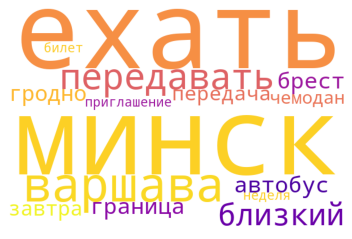

In [148]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(8)

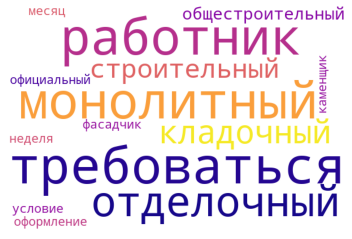

In [149]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(9)

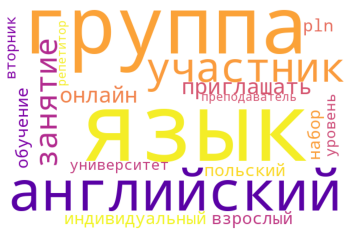

In [150]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(10)

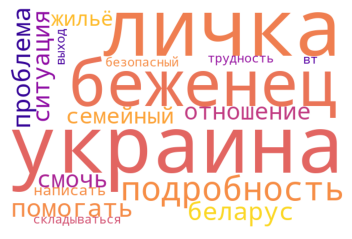

In [151]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(11)

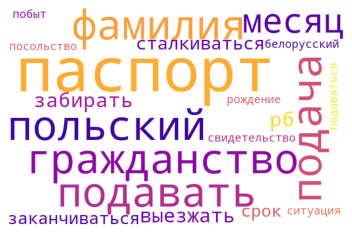

In [152]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(12)

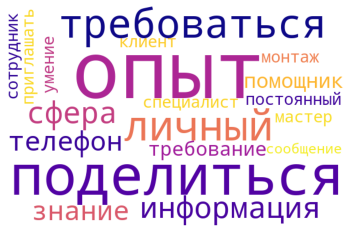

In [153]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(13)

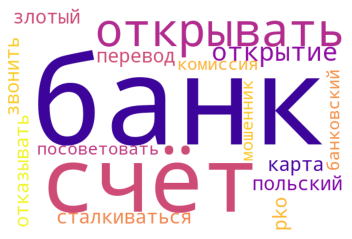

In [154]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(14)